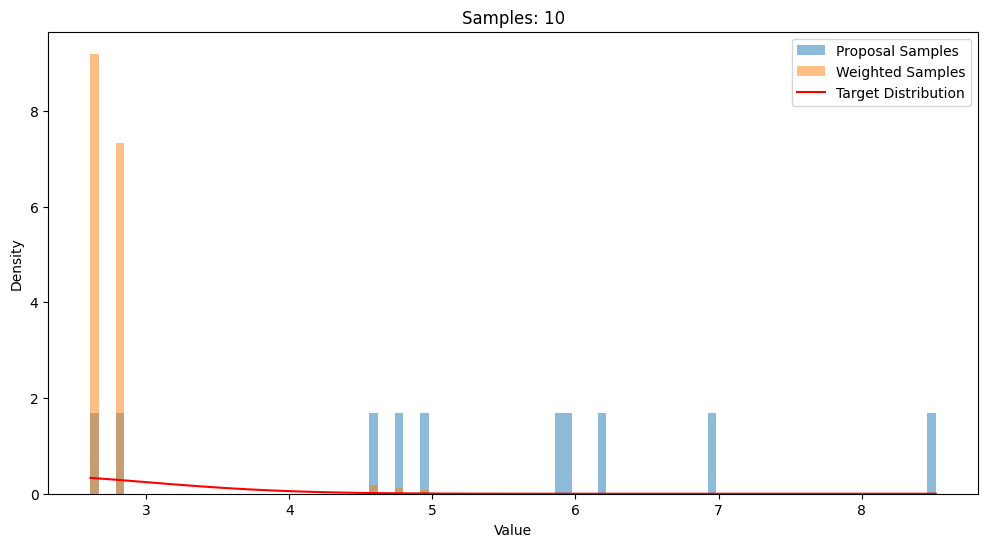

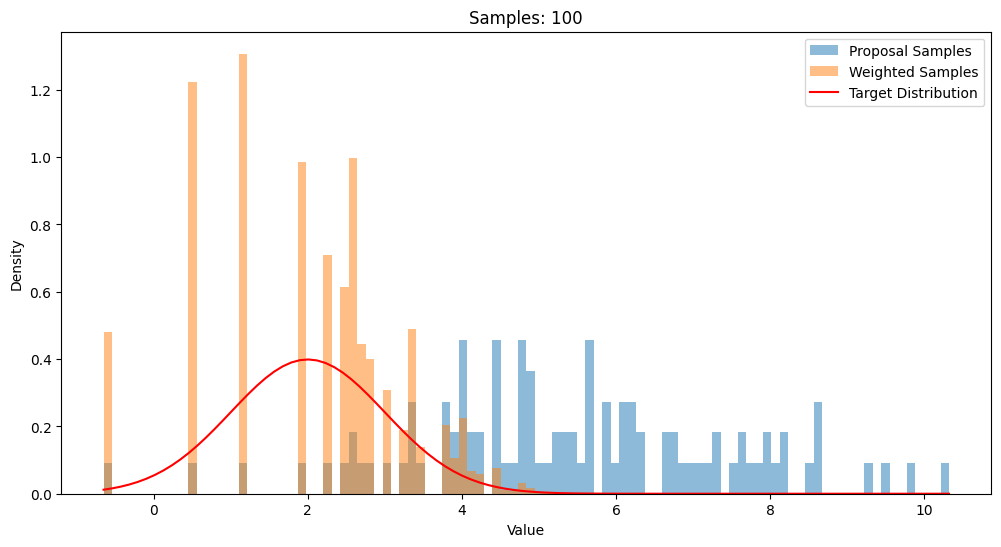

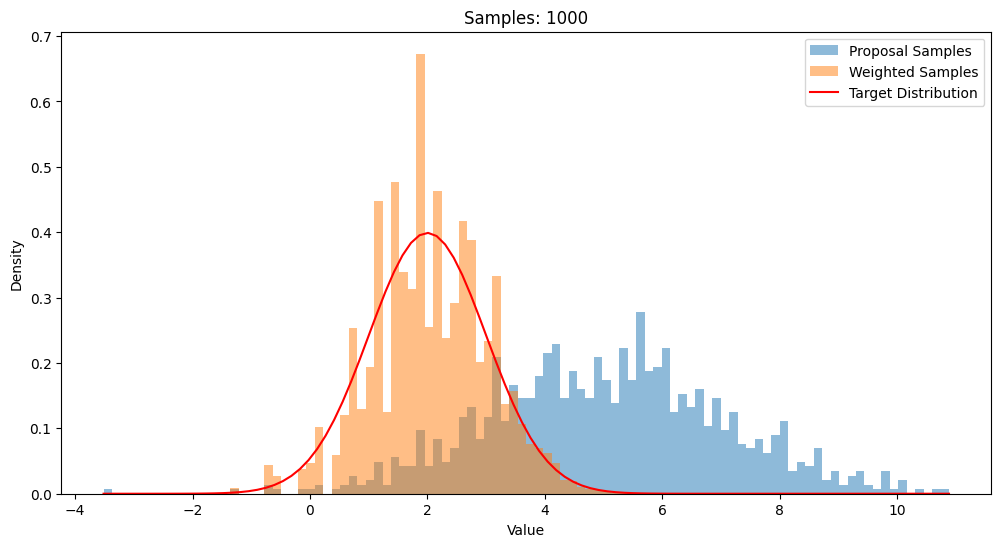

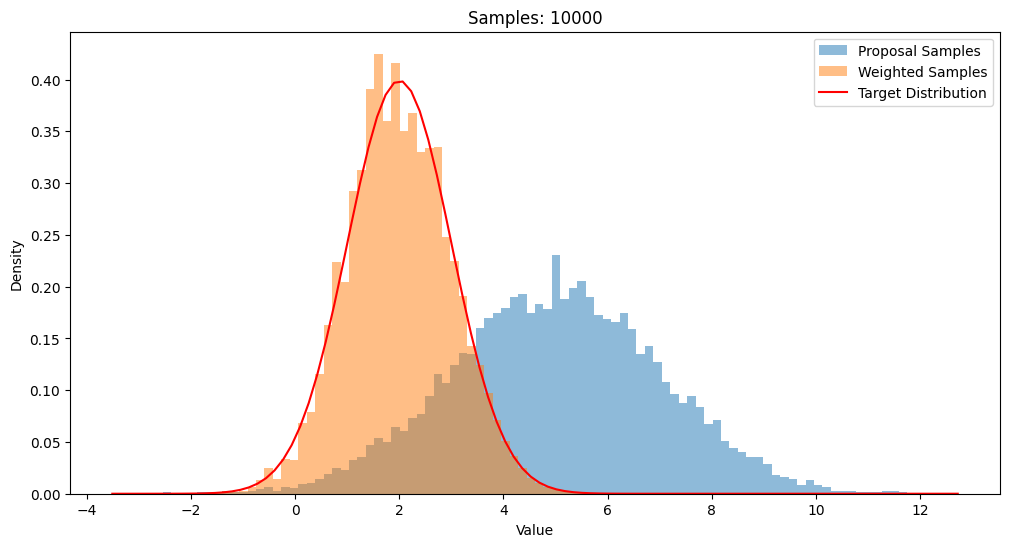

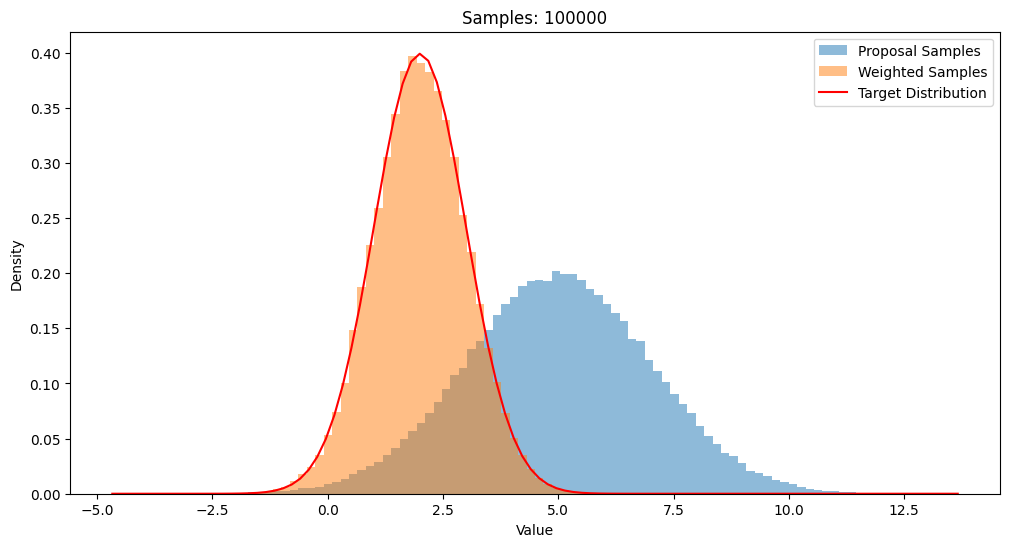

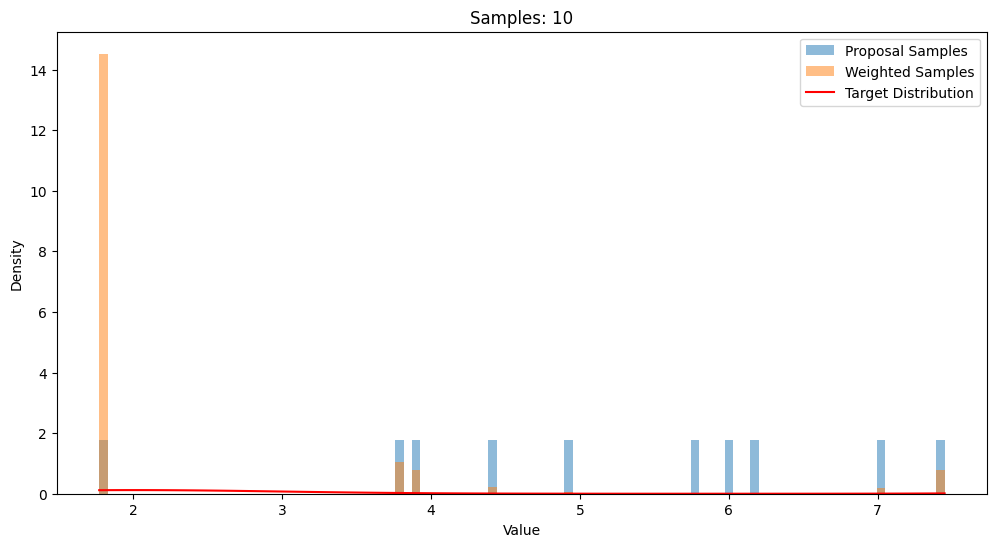

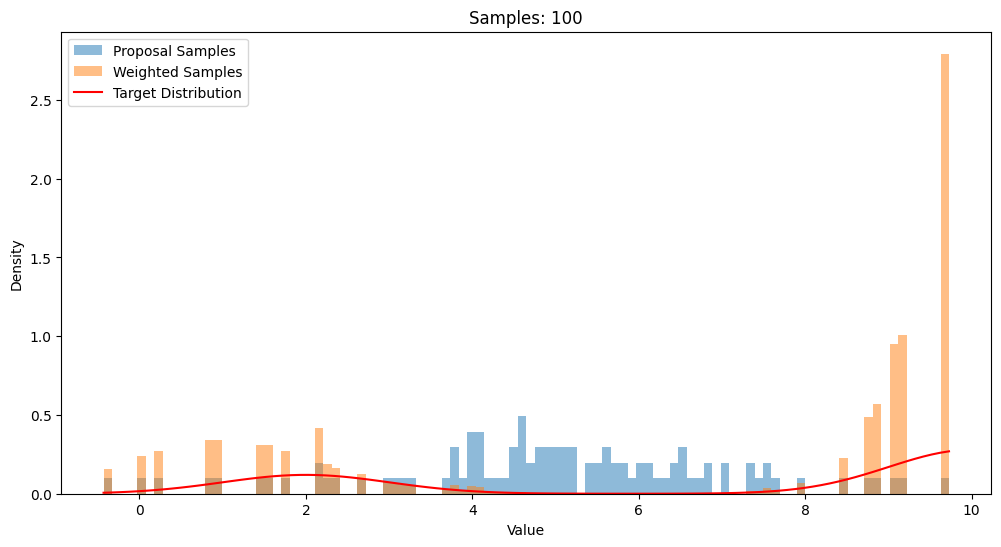

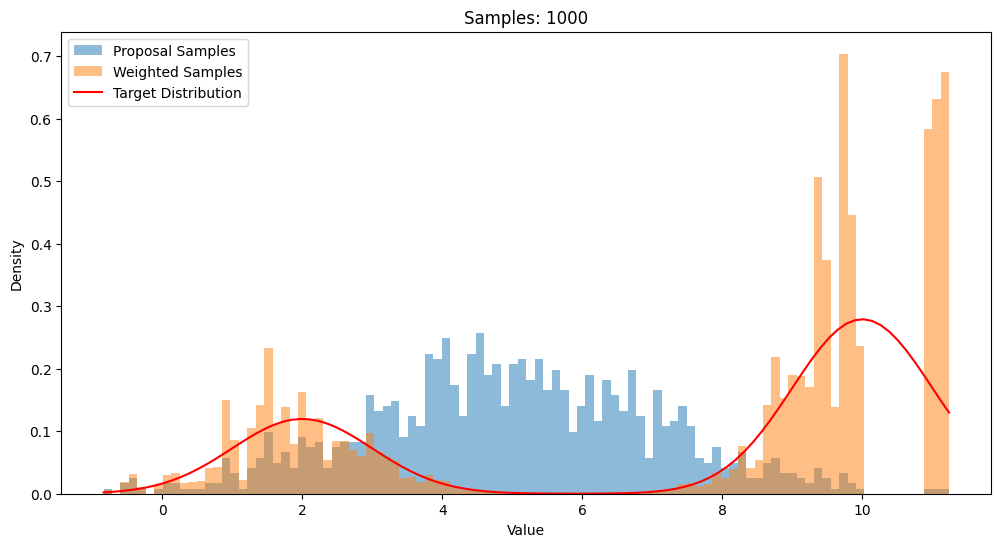

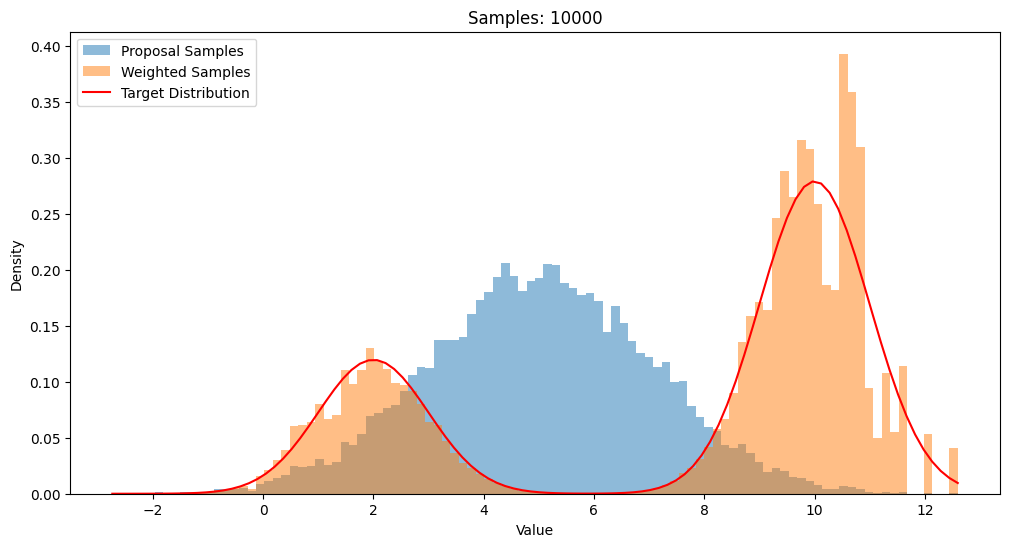

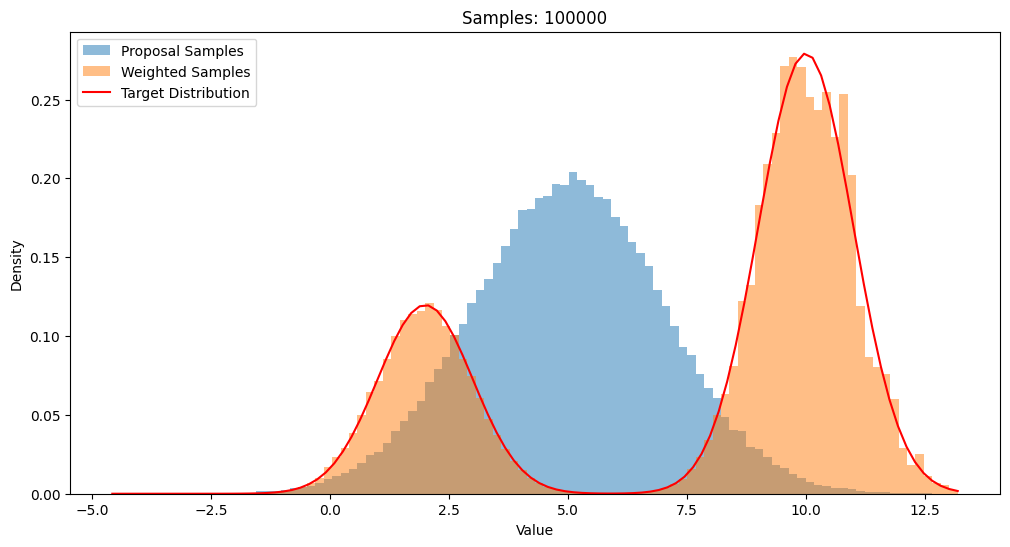

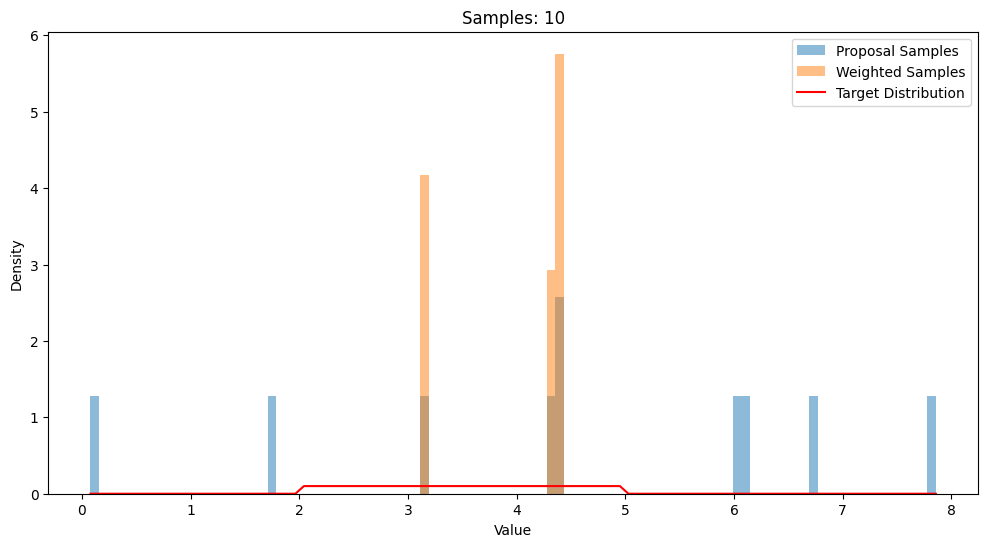

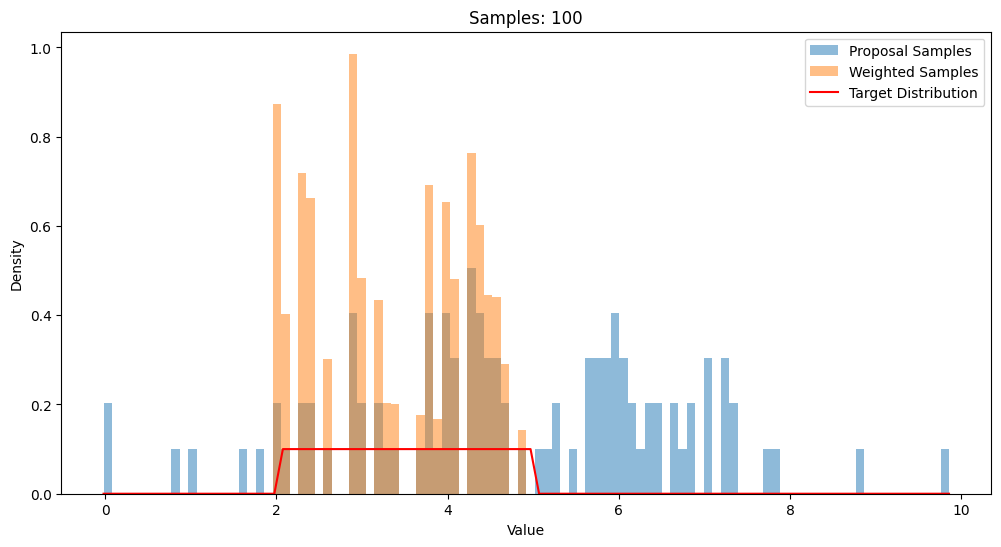

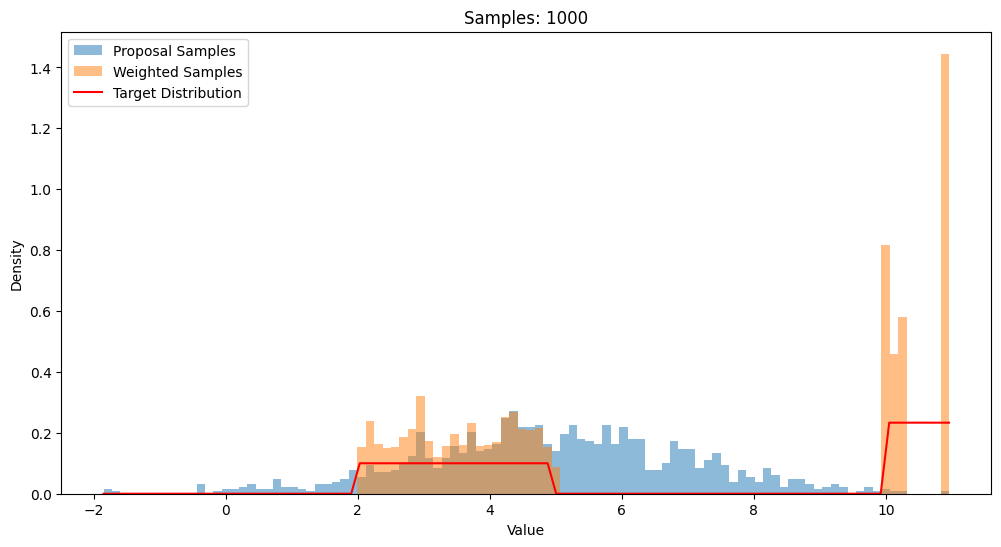

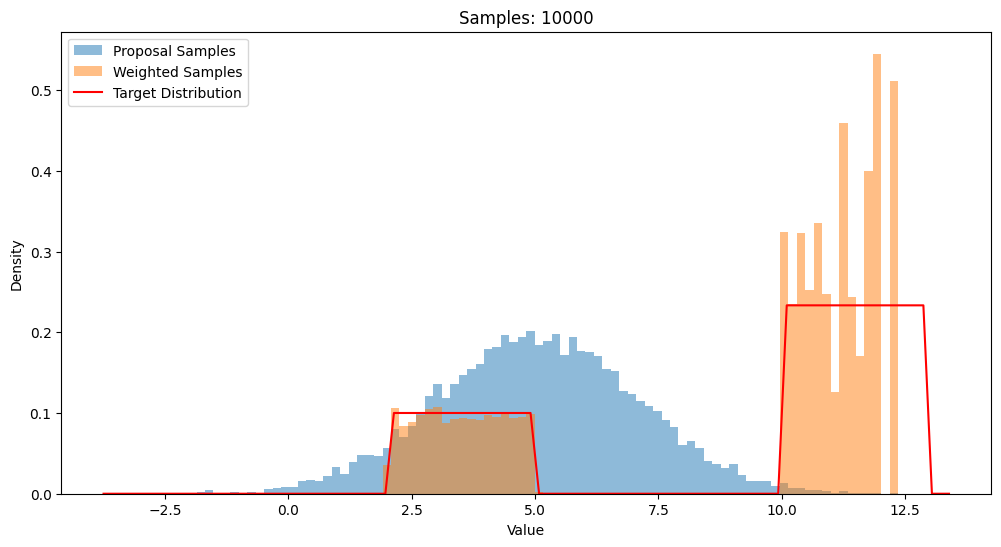

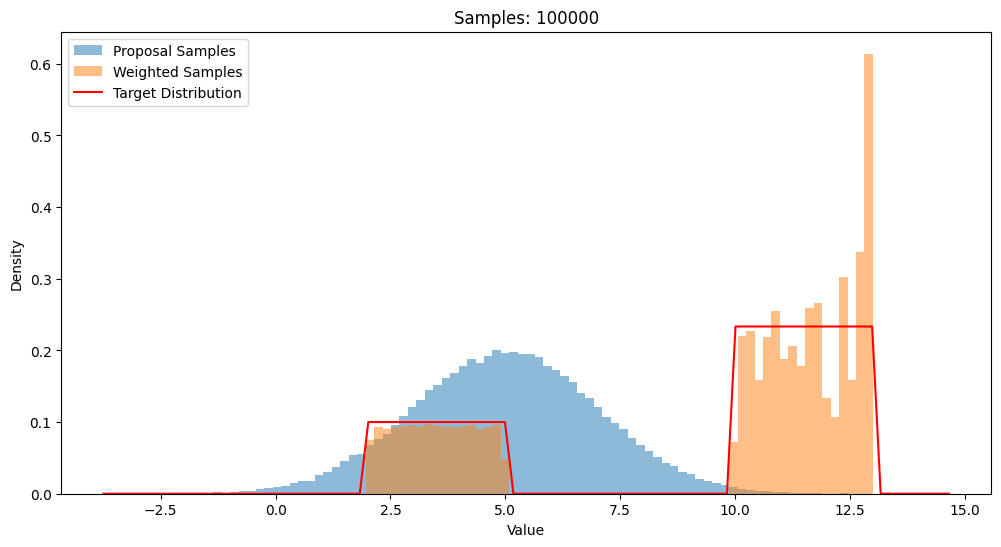

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the target distributions
# TODO
def target_distribution_pdf1(x):
    return np.exp(-0.5 * (x - 2) ** 2) / (np.sqrt(2 * np.pi))

def target_distribution_pdf2(x):
    return 0.3 * np.exp(-0.5 * (x - 2) ** 2) / (np.sqrt(2 * np.pi)) + 0.7 * np.exp(-0.5 * (x - 10) ** 2) / (np.sqrt(2 * np.pi))

def target_distribution_pdf3(x):
    res = np.zeros_like(x)
    res[(2 <= x) & (x <= 5)] = 0.1
    res[(10 <= x) & (x <= 13)] = 0.233333
    return res


# Define the proposal distribution
def proposal_distribution(x):
    return np.exp(-0.5 * ((x - 5) / 2) ** 2) / (2 * np.sqrt(2 * np.pi))

# Function to calculate importance weights
def calculate_importance_weights(samples, target_distribution_func):
    return target_distribution_func(samples) / proposal_distribution(samples)

# Function to plot the evolution of histograms and best-fit Gaussian
def plot_evolution_and_fit(num_samples, increments, target_distribution_func):
    total_samples = []
    weights = []

    for increment in increments:
        new_samples = np.random.normal(5, 2, increment)
        total_samples.extend(new_samples)
        new_weights = calculate_importance_weights(new_samples, target_distribution_func)
        weights.extend(new_weights)

        total_samples_array = np.array(total_samples)
        weights_array = np.array(weights)

        # Plot the weighted histogram to approximate the target distribution
        plt.figure(figsize=(12, 6))

        # Plot proposal samples histogram
        plt.hist(total_samples_array, bins=100, alpha=0.5, label='Proposal Samples', density=True)

        # Plot weighted samples histogram
        plt.hist(total_samples_array, bins=100, weights=weights_array, alpha=0.5, label='Weighted Samples', density=True)

        # Calculate and plot best-fit Gaussian for weighted samples
        x = np.linspace(np.min(total_samples_array), np.max(total_samples_array), 100)

        # Plot the true target distribution for comparison
        y = target_distribution_func(x)
        plt.plot(x, y, 'r-', label='Target Distribution')

        plt.title(f"Samples: {len(total_samples)}")
        plt.xlabel("Value")
        plt.ylabel("Density")
        plt.legend()
        plt.show()

# Parameters
num_samples = 100000
increments = [10, 90, 900, 9000, 90000]  # Sample sizes to show evolution

# Plot the evolution of histograms for all three target functions
plot_evolution_and_fit(num_samples, increments, target_distribution_pdf1)
plot_evolution_and_fit(num_samples, increments, target_distribution_pdf2)
plot_evolution_and_fit(num_samples, increments, target_distribution_pdf3)


In [9]:
# TODO run importance sampling with 100000
new_samples = np.random.normal(5, 2, num_samples)
mean1 = np.sum(new_samples * calculate_importance_weights(new_samples, target_distribution_pdf1)) / num_samples
print("Mean for Target 1 Distribution: " + str(mean1))
print("Expected mean: 2")
print("Difference: " + str(mean1 - 2))

mean2 = np.sum(new_samples * calculate_importance_weights(new_samples, target_distribution_pdf2)) / num_samples
print("Mean for Target 2 Distribution: " + str(mean2))
print("Expected mean: 7.6")
print("Difference: " + str(mean2 - 7.6))

mean3 = np.sum(new_samples * calculate_importance_weights(new_samples, target_distribution_pdf3)) / num_samples
print("Mean for Target 3 Distribution: " + str(mean3))
print("Expected mean: 9.1")
print("Difference: " + str(mean3 - 9.1))


Mean for Target 1 Distribution: 1.993730617609637
Expected mean: 2
Difference: -0.00626938239036301
Mean for Target 2 Distribution: 7.513340259283599
Expected mean: 7.6
Difference: -0.08665974071640026
Mean for Target 3 Distribution: 9.246695427411451
Expected mean: 9.1
Difference: 0.14669542741145136
